In [1]:
library(syuzhet)
library(readr)
library(stringr)
library(dplyr)
require(tidytext)
require(tm)
require(quanteda)
require(readtext)
require(ggplot2)



Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: tidytext
Loading required package: tm
Loading required package: NLP
Loading required package: quanteda
quanteda version 0.99.22
Using 3 of 4 threads for parallel computing

Attaching package: 'quanteda'

The following objects are masked from 'package:tm':

    as.DocumentTermMatrix, stopwords

The following object is masked from 'jupyter:irkernel':

    View

The following object is masked from 'package:utils':

    View

Loading required package: readtext
Loading required package: ggplot2

Attaching package: 'ggplot2'

The following object is masked from 'package:NLP':

    annotate



In [2]:
cname <- file.path("usa-central-bank", "fomc-statements")   
dir(cname)

[1] "2014-01-29.txt" "2014-03-19.txt" "2014-04-30.txt" "2014-06-18.txt"
 [5] "2014-07-30.txt" "2014-09-17.txt" "2014-10-29.txt" "2014-12-17.txt"
 [9] "2015-01-28.txt" "2015-03-18.txt" "2015-04-29.txt" "2015-06-17.txt"
[13] "2015-07-29.txt" "2015-09-17.txt" "2015-10-28.txt" "2015-12-16.txt"
[17] "2016-01-27.txt" "2016-03-16.txt" "2016-04-27.txt" "2016-06-15.txt"
[21] "2016-07-27.txt" "2016-09-21.txt" "2016-11-02.txt" "2016-12-14.txt"
[25] "2017-02-01.txt" "2017-03-15.txt" "2017-05-03.txt" "2017-06-14.txt"
[29] "2017-07-26.txt" "2017-09-20.txt"

In [3]:
text <- VCorpus(DirSource(cname))   

In [7]:
#cd_td <- tidy(text)


In [14]:
text <- tm_map(text, removePunctuation)
cb_text <- DocumentTermMatrix(text)
cb_text <- tidy(cb_text)

In [15]:
cb_text  %>%
    unnest_tokens(word, term)


document,count,word
2014-01-29.txt,2,612
2014-01-29.txt,1,about
2014-01-29.txt,2,above
2014-01-29.txt,2,accommodation
2014-01-29.txt,3,accommodative
2014-01-29.txt,1,account
2014-01-29.txt,1,action
2014-01-29.txt,3,activity
2014-01-29.txt,2,add
2014-01-29.txt,1,additional


In [16]:
cb_text <- cb_text %>%
    anti_join(stop_words, by = c("term" = "word"))    
cb_text

document,term,count
2014-01-29.txt,612,2
2014-01-29.txt,accommodation,2
2014-01-29.txt,accommodative,3
2014-01-29.txt,account,1
2014-01-29.txt,action,1
2014-01-29.txt,activity,3
2014-01-29.txt,add,2
2014-01-29.txt,additional,1
2014-01-29.txt,advanced,1
2014-01-29.txt,agency,5


In [17]:
cb_sentiments <-cb_text %>%
    inner_join(get_sentiments("bing"), by = c(term = "word"))

cb_sentiments

document,term,count,sentiment
2014-01-29.txt,accommodative,3,positive
2014-01-29.txt,advanced,1,positive
2014-01-29.txt,balanced,2,positive
2014-01-29.txt,consistent,5,positive
2014-01-29.txt,debt,1,negative
2014-01-29.txt,decline,1,negative
2014-01-29.txt,declines,1,negative
2014-01-29.txt,exceptionally,1,positive
2014-01-29.txt,improved,1,positive
2014-01-29.txt,improvement,4,positive


In [18]:
cb_text %>%
    count(term, sort=TRUE)

term,n
accommodative,30
account,30
action,30
activity,30
assessment,30
business,30
chairman,30
committee,30
conditions,30
consistent,30


Warning message:
"The plyr::rename operation has created duplicates for the following name(s): (``)"

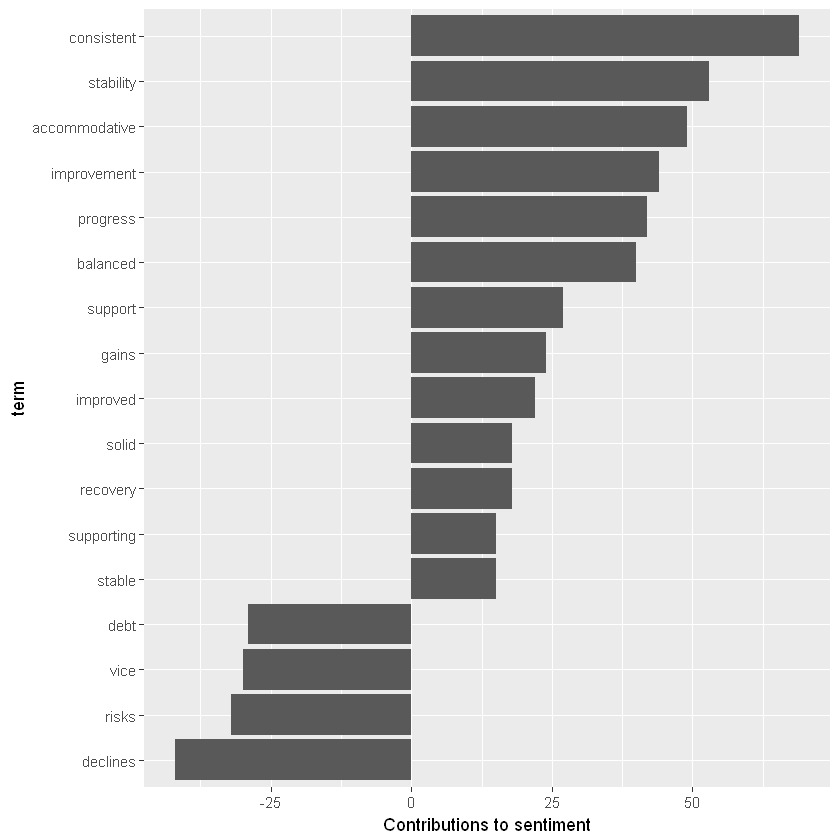

In [19]:
cb_sentiments %>%
    count(sentiment, term, wt = count) %>%
    ungroup() %>%
    filter(n >= 15) %>%
    mutate(n = ifelse(sentiment == "negative", -n, n)) %>%
    mutate(term = reorder(term, n)) %>%
    ggplot(aes(term, n, fill, sentiment)) +
    geom_bar(stat = "identity") +
    ylab("Contributions to sentiment") +
    coord_flip()

In [20]:
cb_tf_idf <- cb_text %>%
    bind_tf_idf(term, document, count) %>%
    arrange(desc(tf_idf))
cb_tf_idf

document,term,count,tf,idf,tf_idf
2015-01-28.txt,committeeâ€™s,3,0.009009009,3.401197,0.03064142
2017-09-20.txt,hurricanes,2,0.006600660,3.401197,0.02245015
2014-06-18.txt,purchases,5,0.011415525,1.609438,0.01837258
2014-04-30.txt,purchases,5,0.011363636,1.609438,0.01828907
2014-01-29.txt,purchases,5,0.011235955,1.609438,0.01808357
2014-07-30.txt,purchases,5,0.010940919,1.609438,0.01760873
2014-07-30.txt,asset,6,0.013129103,1.321756,0.01735347
2014-03-19.txt,purchases,5,0.010460251,1.609438,0.01683512
2014-09-17.txt,purchases,5,0.010288066,1.609438,0.01655800
2014-09-17.txt,asset,6,0.012345679,1.321756,0.01631797


[1] "The Official Cash Rate (OCR) will remain unchanged at 7.25 percent."                                                                                                               
[2] "Reserve Bank Governor Alan Bollard said: The economy has continued to slow in recent months, broadly in line with the outlook contained in our December Monetary Policy Statement."
[3] "GDP growth slowed in the third quarter of 2005, due to kthe impact of the high exchange rate on the export and import-competing sectors, and a fall in construction."              
[4] "Looking to 2006, while there are some early indications, we are yet to see hard evidence of a sustained slowdown in domestic demand. "

In [9]:
# puts text into data frame
text_df <- data_frame(line=1:4, text = text)
text_df

line,text
1,The Official Cash Rate (OCR) will remain unchanged at 7.25 percent.
2,"Reserve Bank Governor Alan Bollard said: The economy has continued to slow in recent months, broadly in line with the outlook contained in our December Monetary Policy Statement."
3,"GDP growth slowed in the third quarter of 2005, due to kthe impact of the high exchange rate on the export and import-competing sectors, and a fall in construction."
4,"Looking to 2006, while there are some early indications, we are yet to see hard evidence of a sustained slowdown in domestic demand."


In [10]:
# turns text into individual tokens
tidy_text <- text_df %>%
    unnest_tokens(word, text)

tidy_text

line,word
1,the
1,official
1,cash
1,rate
1,ocr
1,will
1,remain
1,unchanged
1,at
1,7.25


In [6]:
data(stop_words)

In [7]:
tidy_text <- tidy_text %>%
    anti_join(stop_words)

Joining, by = "word"


In [8]:
tidy_text %>%
    count(word, sort=TRUE)

word,n
rate,2
2005,1
2006,1
7.25,1
alan,1
bank,1
bollard,1
broadly,1
cash,1
competing,1


In [10]:
cb_df <- read.table("vectors/cbtext.txt", header=FALSE)

ERROR: Error in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, : line 1 did not have 50 elements


In [9]:
get_nrc_sentiment("The Official Cash Rate (OCR) will remain unchanged at 7.25 percent.

Reserve Bank Governor Alan Bollard said: The economy has continued to slow in recent months, broadly in line with the outlook contained in our December Monetary Policy Statement. 
GDP growth slowed in the third quarter of 2005, due to the impact of the high exchange rate on the export and import-competing sectors, and a fall in construction. 
Looking to 2006, while there are some early indications, we are yet to see hard evidence of a sustained slowdown in domestic demand. 
To date, strong domestic demand has been fuelled by strong employment, wage growth, rising house prices, and growth in Government spending. 
Overall, total spending continues to outstrip growth in production, contributing to an unsustainably large current account deficit.

Over recent years, considerable pressures have built up on resources, leading to the current high level of inflation. 
While capacity and resource constraints appear now to be easing, inflation pressures remain of concern. 
Annual CPI inflation stands at 3.2 percent, and our forecasts point to inflation remaining toward the upper end of the target band over the next couple of years. 
Continuing increases in wages, energy prices and other business costs suggest that inflation pressures will not subside quickly. 
Of particular concern, inflation expectations remain uncomfortably high.

Given this situation, we do not expect to raise the OCR further in this cycle; however, this possibility cannot be ruled out until we see clear evidence of a sustained weakening in domestic demand. 
Certainly we see no prospect of an OCR easing, given the relatively high medium-term inflation outlook. 
An early decline in interest rates, as expected by some in the financial markets, would risk reigniting spending and hence inflation pressures.")


anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
2,8,0,4,4,1,1,14,7,15


In [6]:
get_nrc_sentiment("Information received since the Federal Open Market Committee met in December indicates that growth in economic activity picked up in recent quarters. Labor market indicators were mixed but on balance showed further improvement. The unemployment rate declined but remains elevated. Household spending and business fixed investment advanced more quickly in recent months, while the recovery in the housing sector slowed somewhat. Fiscal policy is restraining economic growth, although the extent of restraint is diminishing. Inflation has been running below the Committee's longer-run objective, but longer-term inflation expectations have remained stable.

Consistent with its statutory mandate, the Committee seeks to foster maximum employment and price stability. The Committee expects that, with appropriate policy accommodation, economic activity will expand at a moderate pace and the unemployment rate will gradually decline toward levels the Committee judges consistent with its dual mandate. The Committee sees the risks to the outlook for the economy and the labor market as having become more nearly balanced. The Committee recognizes that inflation persistently below its 2 percent objective could pose risks to economic performance, and it is monitoring inflation developments carefully for evidence that inflation will move back toward its objective over the medium term.

Taking into account the extent of federal fiscal retrenchment since the inception of its current asset purchase program, the Committee continues to see the improvement in economic activity and labor market conditions over that period as consistent with growing underlying strength in the broader economy. In light of the cumulative progress toward maximum employment and the improvement in the outlook for labor market conditions, the Committee decided to make a further measured reduction in the pace of its asset purchases. Beginning in February, the Committee will add to its holdings of agency mortgage-backed securities at a pace of $30 billion per month rather than $35 billion per month, and will add to its holdings of longer-term Treasury securities at a pace of $35 billion per month rather than $40 billion per month. The Committee is maintaining its existing policy of reinvesting principal payments from its holdings of agency debt and agency mortgage-backed securities in agency mortgage-backed securities and of rolling over maturing Treasury securities at auction. The Committee's sizable and still-increasing holdings of longer-term securities should maintain downward pressure on longer-term interest rates, support mortgage markets, and help to make broader financial conditions more accommodative, which in turn should promote a stronger economic recovery and help to ensure that inflation, over time, is at the rate most consistent with the Committee's dual mandate.

The Committee will closely monitor incoming information on economic and financial developments in coming months and will continue its purchases of Treasury and agency mortgage-backed securities, and employ its other  policy tools as appropriate, until the outlook for the labor market has improved substantially in a context of price stability. If incoming information broadly supports the Committee's expectation of ongoing improvement in labor market conditions and inflation moving back toward its longer-run objective, the Committee will likely reduce the pace of asset purchases in further measured steps at future meetings. However, asset purchases are not on a preset course, and the Committee's decisions about their pace will remain contingent on the Committee's outlook for the labor market and inflation as well as its assessment of the likely efficacy and costs of such purchases.

To support continued progress toward maximum employment and price stability, the Committee today reaffirmed its view that a highly accommodative stance of monetary policy will remain appropriate for a considerable time after the asset purchase program ends and the economic recovery strengthens. The Committee also reaffirmed its expectation that the current exceptionally low target range for the federal funds rate of 0 to 1/4 percent will be appropriate at least as long as the unemployment rate remains above 6-1/2 percent, inflation between one and two years ahead is projected to be no more than a half percentage point above the Committee's 2 percent longer-run goal, and longer-term inflation expectations continue to be well anchored. In determining how long to maintain a highly accommodative stance of monetary policy, the Committee will also consider other information, including additional measures of labor market conditions, indicators of inflation pressures and inflation expectations, and readings on financial developments. The Committee continues to anticipate, based on its assessment of these factors, that it likely will be appropriate to maintain the current target range for the federal funds rate well past the time that the unemployment rate declines below 6-1/2 percent, especially if projected inflation continues to run below the Committee's 2 percent longer-run goal. When the Committee decides to begin to remove policy accommodation, it will take a balanced approach consistent with its longer-run goals of maximum employment and inflation of 2 percent.
")

anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
1,12,1,5,3,2,2,17,8,31
